In [4]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.pitch import Pitch

Home or Away?away
Enter Player 1's ID:300299
Enter Player 2's ID:118244


Text(0.5, 1, 'Leeds')

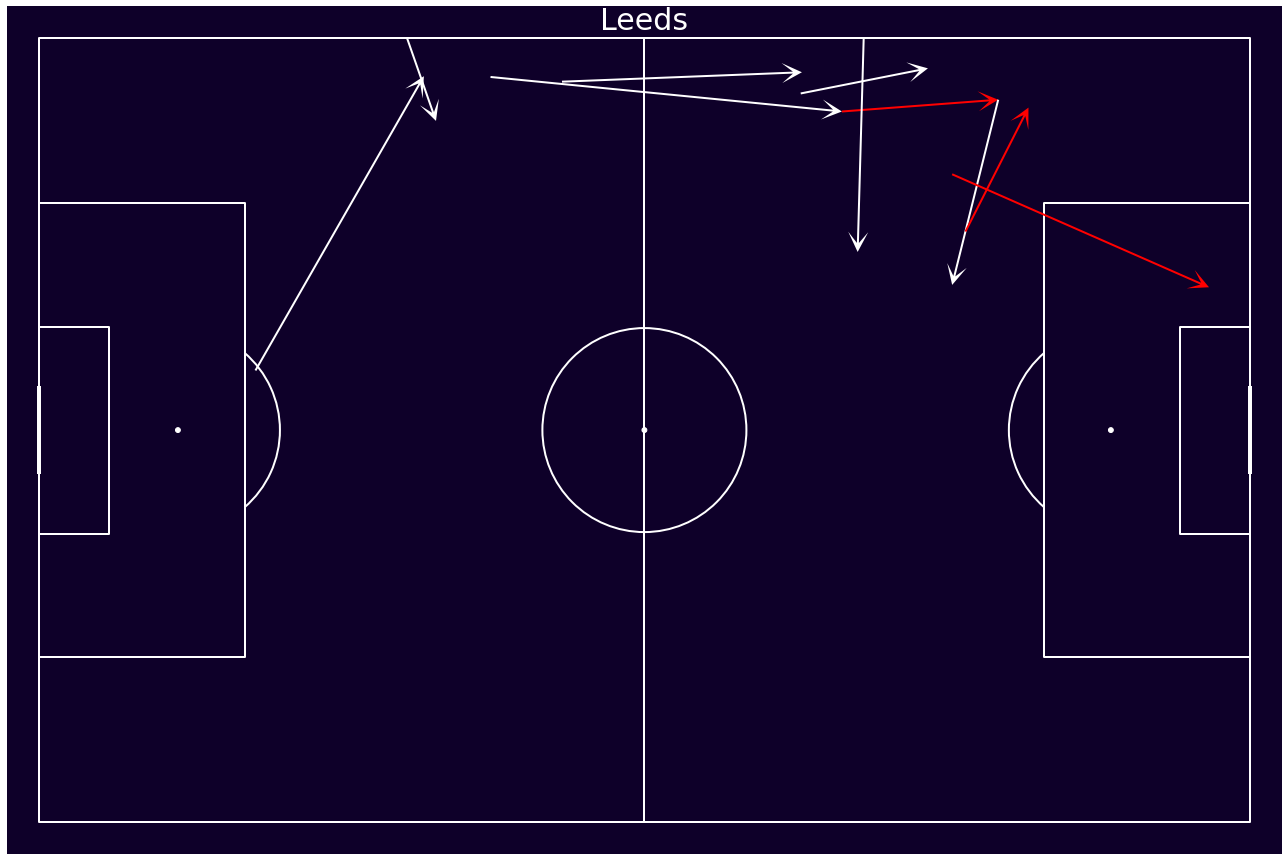

In [5]:
with open (DATA_PATH) as f:
    data = json.load(f)

h_o_a = str(input("Home or Away?"))
t_id = data[h_o_a]['teamId']

if h_o_a == 'home':
    team_name = data['away']['name']
else:
    team_name = data['home']['name']

pid1 = int(input("Enter Player 1's ID:"))
pid2 = int(input("Enter Player 2's ID:"))

pitch = Pitch(pitch_type='opta', pitch_color="#0E0029", line_color='white', stripe=False, goal_alpha=2, linewidth=2)
(fig, ax) = pitch.draw(figsize=(18,14))

for i in range(0, len(data['events'])):
    if i < len(data['events']):
        if 'type' and 'outcomeType' in data['events'][i].keys():
            if data['events'][i]['type']['displayName'] == 'Pass' and data['events'][i]['teamId'] == t_id:
                if 'playerId' in data['events'][i].keys() and 'playerId' in data['events'][i+1].keys():
                    if data['events'][i]['playerId'] == pid1 and data['events'][i+1]['playerId'] == pid2:

                        pitch.arrows(data['events'][i]['x'], data['events'][i]['y'], data['events'][i+1]['x'], data['events'][i+1]['y'],
                                    width=2, headwidth=10, headlength=10, color='red', 
                                     ax=ax, label='Maguire to Lindelof')

                    elif data['events'][i]['playerId'] == pid2 and data['events'][i+1]['playerId'] == pid1:

                        pitch.arrows(data['events'][i]['x'], data['events'][i]['y'], data['events'][i+1]['x'], data['events'][i+1]['y'],
                                    width=2, headwidth=10, headlength=10, color='white', 
                                     ax=ax, label='Lindelof to Maguire')
                        
ax.text(0.5, 1, team_name, verticalalignment='top', horizontalalignment='center', transform=ax.transAxes, color='white', fontsize=30)